In [3]:
import tensorflow as tf
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers import ReLU,LeakyReLU

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
cnn = Sequential()


In [5]:
cnn.add(Conv2D(32,(3,3),input_shape = (150,150,3),activation = 'relu'))
cnn.add(MaxPooling2D(pool_size = (2,2)))
cnn.add(Conv2D(32,(3,3),activation = 'relu'))
cnn.add(MaxPooling2D(pool_size = (2,2)))
cnn.add(Flatten())


C:\Users\shreeyansh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:

cnn.add(Dense(units = 64,activation = 'relu'))
cnn.add(Dense(units = 32,activation = 'relu'))
cnn.add(Dense(units = 1,activation = 'sigmoid'))

In [7]:
cnn.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [22]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        r'C:\Users\shreeyansh\Desktop\coding st\learning ML\deep-learning\cnn project\cats_and_dogs_filtered\train',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        r'C:\Users\shreeyansh\Desktop\coding st\learning ML\deep-learning\cnn project\cats_and_dogs_filtered\validation',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history=cnn.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=25,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 163ms/step - accuracy: 0.9310 - loss: 0.1716 - val_accuracy: 0.7380 - val_loss: 0.7272
Epoch 2/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 164ms/step - accuracy: 0.9465 - loss: 0.1375 - val_accuracy: 0.7250 - val_loss: 0.9007
Epoch 3/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 166ms/step - accuracy: 0.9505 - loss: 0.1347 - val_accuracy: 0.7330 - val_loss: 0.9552
Epoch 4/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 161ms/step - accuracy: 0.9565 - loss: 0.1225 - val_accuracy: 0.7220 - val_loss: 0.9460
Epoch 5/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 162ms/step - accuracy: 0.9585 - loss: 0.1084 - val_accuracy: 0.7370 - val_loss: 0.9314
Epoch 6/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 162ms/step - accuracy: 0.9575 - loss: 0.1033 - val_accuracy: 0.7390 - val_loss: 0.9273
Epoch 7/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 162ms/step - accuracy: 0.9725 - loss: 0.0847 - val_accuracy: 0.7360 - val_loss: 1.0763
Epoch 8/25
63

In [23]:
history.history.keys()


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

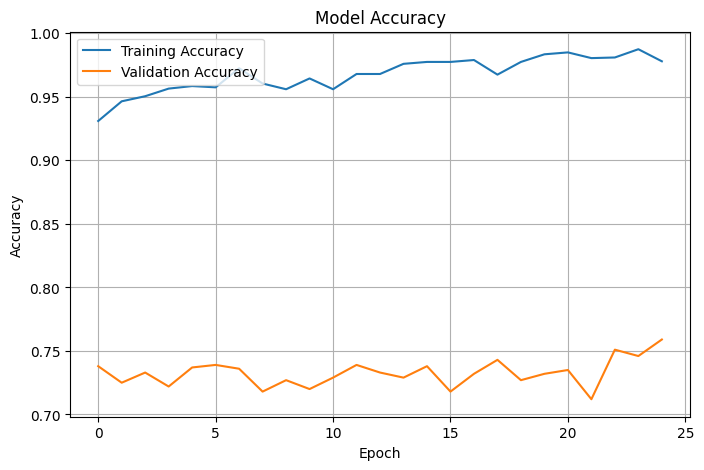

In [24]:
plt.figure(figsize=(8,5))

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid(True)

plt.show()



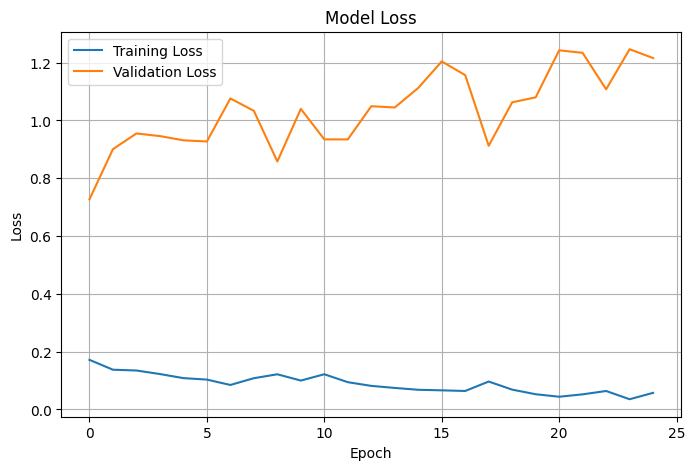

In [25]:
plt.figure(figsize=(8,5))

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid(True)

plt.show()


In [26]:
from keras.preprocessing import image
import numpy as np

# Load and preprocess image
img_path = r'C:\Users\shreeyansh\Desktop\coding st\learning ML\deep-learning\cnn project\cats_and_dogs_filtered\prediction cat,dog\cat6-1744094950340-e44df3c1-dcf7-4164-8199-1182c8d838df-900x506.webp'
img = image.load_img(img_path, target_size=(150, 150))
img = image.img_to_array(img)
img = img / 255.0
img = np.expand_dims(img, axis=0)

# Predict
prediction = cnn.predict(img)
print("Prediction value:", prediction)

if prediction > 0.5:
    print("🐶 Dog Detected")
else:
    print("🐱 Cat Detected")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Prediction value: [[2.9439112e-05]]
🐱 Cat Detected
